# PREDICTION OF  AUTOMOBILE

IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# DATA PROCESSING

In [3]:
c_df=pd.read_csv("C:/Users/yuvak/OneDrive/Desktop/ML PROJECTS 1&2 FROM BI/AutoData (1).csv")

In [4]:
c_df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
c_df.tail()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
c_df.shape

(205, 25)

In [8]:
c_df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [10]:
c_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# DATA CLEANING

In [11]:
c_df.duplicated().sum()

0

In [15]:
c_df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
c_df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

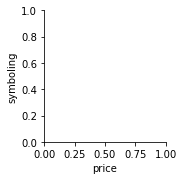

In [25]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data=c_df)

In [26]:
c_df['make'].value_counts()

peugeot 504             6
toyota corolla          6
toyota corona           6
subaru dl               4
mitsubishi g4           3
                       ..
plymouth duster         1
mitsubishi mirage       1
porsche boxter          1
audi fox                1
dodge coronet custom    1
Name: make, Length: 147, dtype: int64

In [27]:
c_df['car_company'] = c_df['make'].apply(lambda x:x.split(' ')[0])

In [28]:
c_df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [29]:
c_df = c_df.drop(['make'], axis =1)

In [30]:
c_df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
maxda           2
vw              2
renault         2
Nissan          1
vokswagen       1
toyouta         1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [32]:
c_df['car_company'].replace('toyouta', 'toyota',inplace=True)
c_df['car_company'].replace('Nissan', 'nissan',inplace=True)
c_df['car_company'].replace('maxda', 'mazda',inplace=True)
c_df['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
c_df['car_company'].replace('vw', 'volkswagen',inplace=True)
c_df['car_company'].replace('porcshce', 'porsche',inplace=True)

In [33]:
c_df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

mistakes are re-summerized

In [34]:
c_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [35]:
c_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [36]:
c_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [37]:
c_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [38]:
c_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [39]:
c_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [40]:
c_df['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

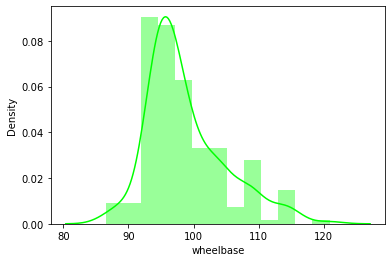

In [41]:
sns.distplot(c_df['wheelbase'],color="lime")
plt.show()

In [42]:
c_df['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
Name: carlength, dtype: int64

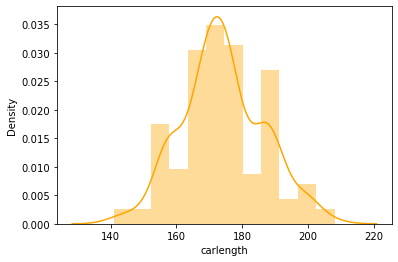

In [43]:
sns.distplot(c_df['carlength'],color="orange")
plt.show()

In [44]:
c_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [45]:
c_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [46]:
def number(x):
    return x.map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})
c_df['cylindernumber']=c_df[['cylindernumber']].apply(number)

In [47]:
c_df['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [48]:
c_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

# Data Visulaization:

In [52]:
c_num = c_df.select_dtypes(include =['int64','float64'])

In [53]:
c_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
c_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   cylindernumber    205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

<Figure size 1800x1800 with 0 Axes>

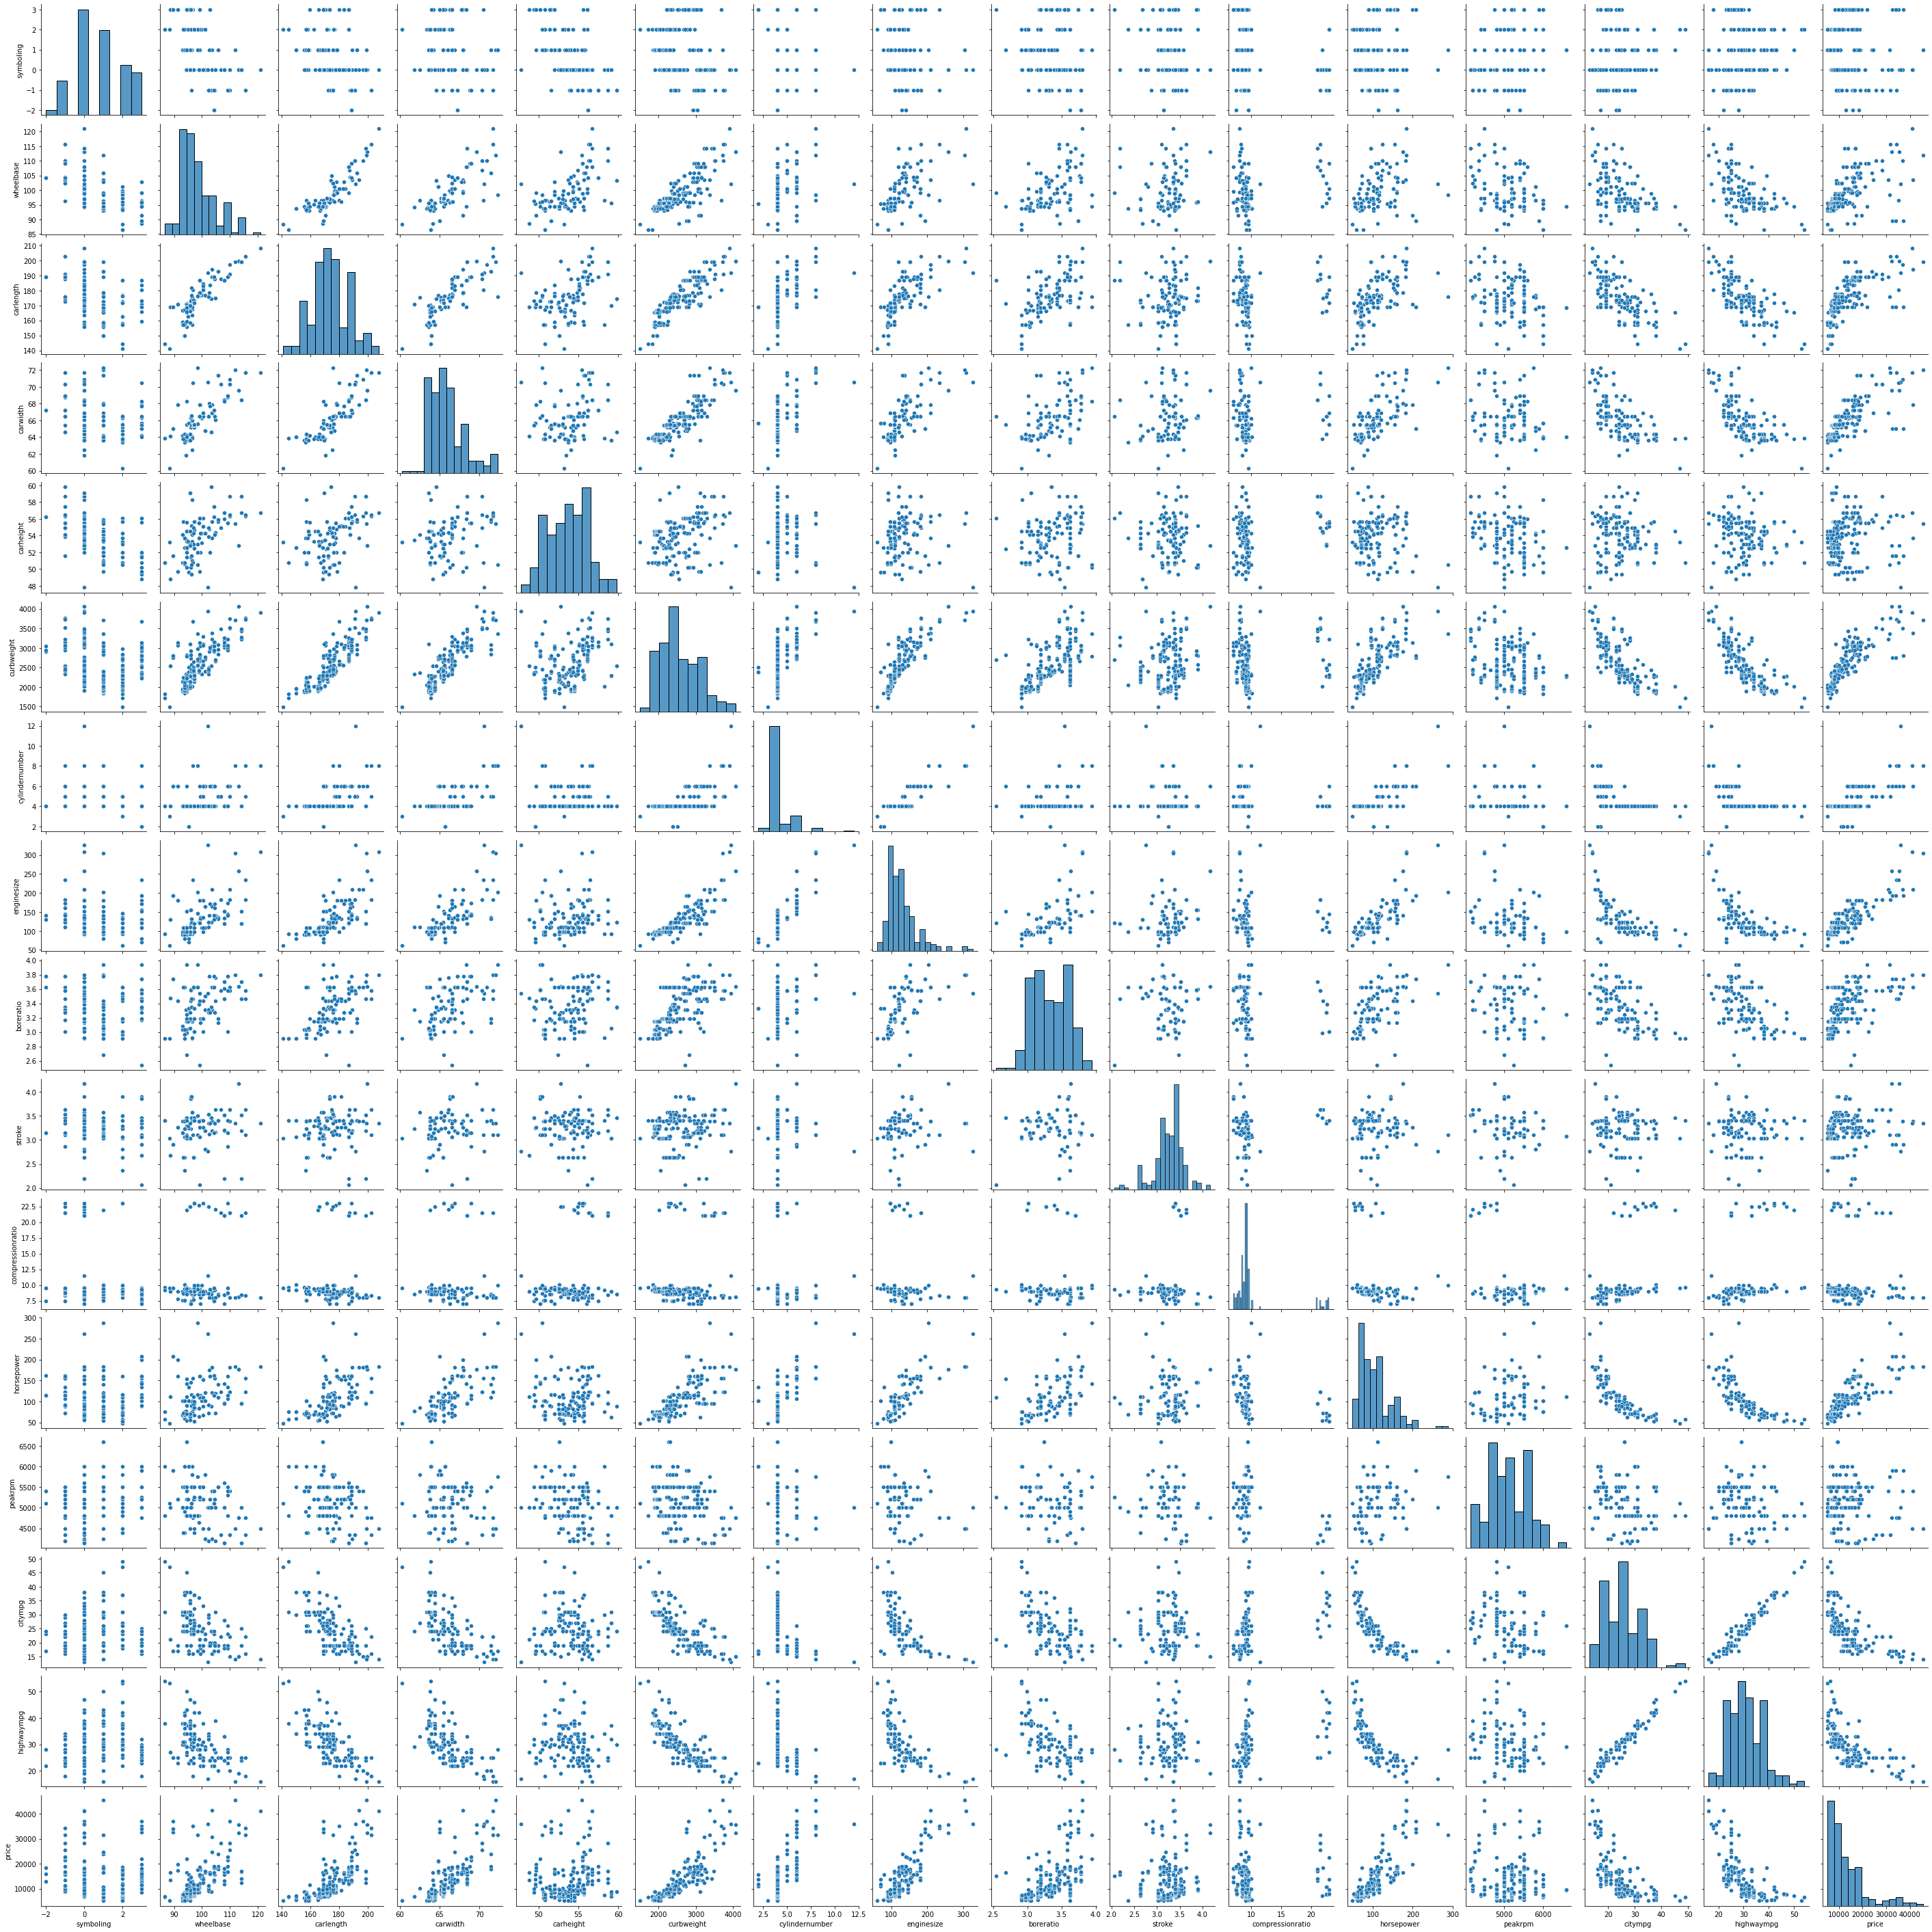

In [57]:
plt.figure(figsize = (25,25))
sns.pairplot(c_num)
plt.show()

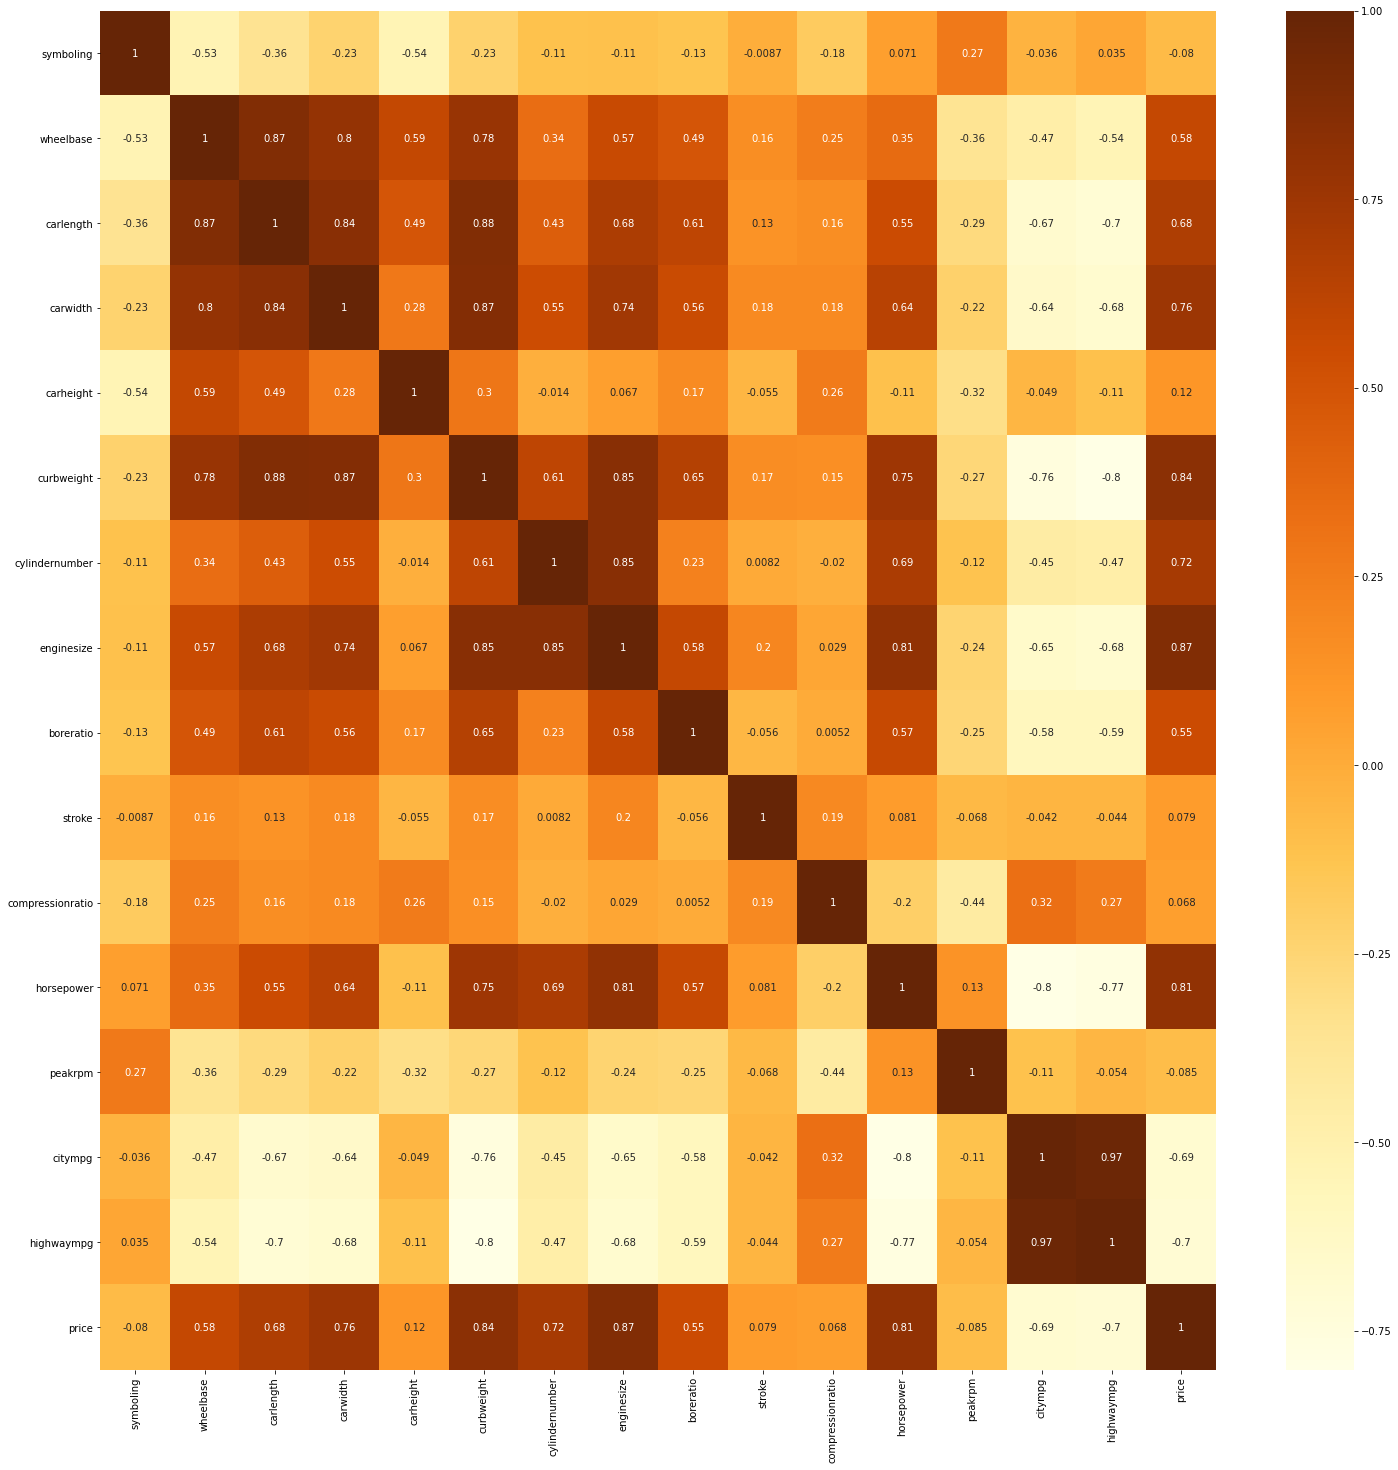

In [61]:
plt.figure(figsize = (25,25))
sns.heatmap(c_df.corr(), annot = True ,cmap = 'YlOrBr')
plt.show()

-Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

-Price is negatively correlated to symboling, citympg and highwaympg.

-This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.

-There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [62]:
categorical_cols = c_df.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,two,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,mpfi,audi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

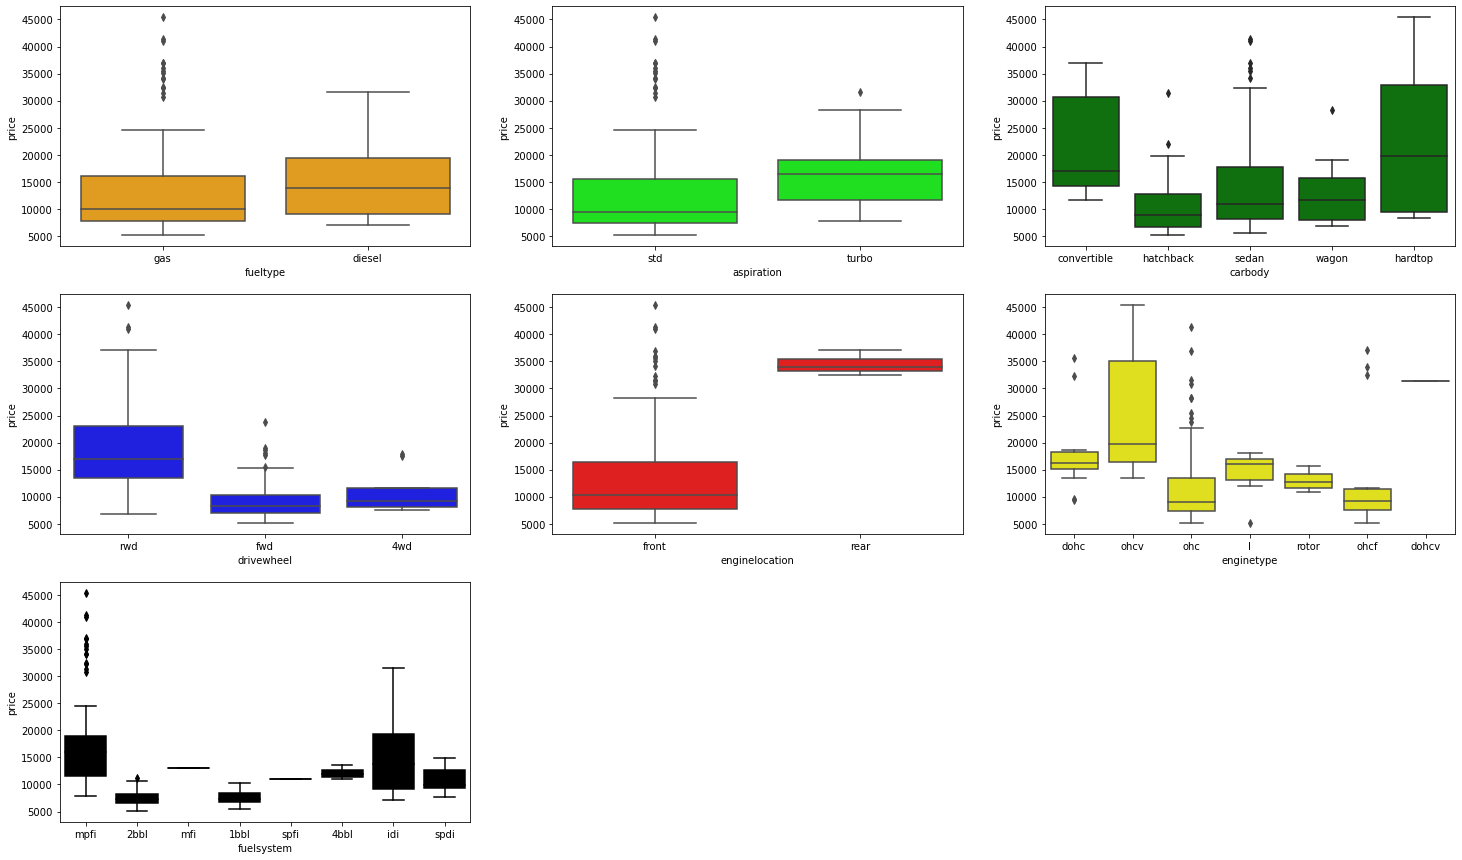

In [64]:
plt.figure(figsize = (25,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = c_df,color="orange")
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = c_df,color="lime")
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = c_df,color="green")
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = c_df,color="blue")
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = c_df,color="red")
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = c_df,color="yellow")
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = c_df,color="black")

<AxesSubplot:xlabel='car_company', ylabel='price'>

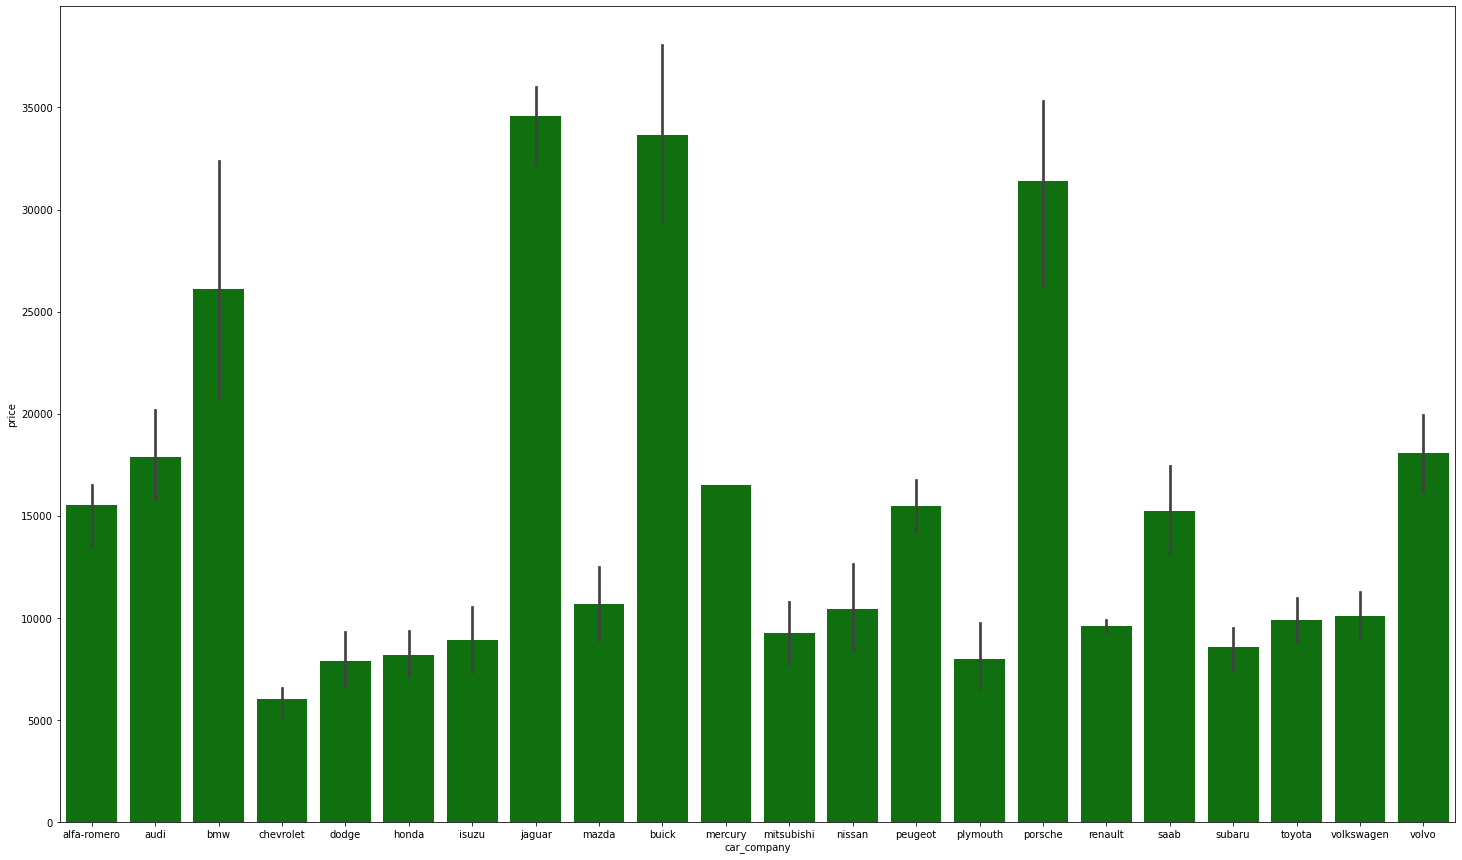

In [71]:
plt.figure(figsize = (25,15))
sns.barplot(x = 'car_company', y = 'price', data = c_df,color="green")

1. From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar    and porsche.

2. Whereas the lower priced cars belong to chevrolet

3. The median price of gas vehicles is lower than that of Diesel Vehicles.

4. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles.

5. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of two-door vehicles.

6. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.

7. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines.

8. Almost all vehicles in the dataset have engines placed in the front of the vehicle. However, the price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines.

9. The median cost of eight cylinder vehicles is higher than other cylinder categories.

10. It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are also some outliers on the higher price side having MPFI systems.

11. Vehicles with OHCV engine type falls under higher price range.

# Extract Features and Target

In [461]:
c_df

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,two,0.058309,0.413433,0.316667,48.8,0.411171,4,0.260377,0.664286,...,0,0,0,0,0,0,0,0,0,0
1,3,two,0.058309,0.413433,0.316667,48.8,0.411171,4,0.260377,0.664286,...,0,0,0,0,0,0,0,0,0,0
2,1,two,0.230321,0.449254,0.433333,52.4,0.517843,6,0.343396,0.100000,...,0,0,0,0,0,0,0,0,0,0
3,2,four,0.384840,0.529851,0.491667,54.3,0.329325,4,0.181132,0.464286,...,0,0,0,0,0,0,0,0,0,0
4,2,four,0.373178,0.529851,0.508333,54.3,0.518231,5,0.283019,0.464286,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,four,0.655977,0.711940,0.716667,55.5,0.567882,4,0.301887,0.885714,...,0,0,0,0,0,0,0,0,0,1
201,-1,four,0.655977,0.711940,0.708333,55.5,0.605508,4,0.301887,0.885714,...,0,0,0,0,0,0,0,0,0,1
202,-1,four,0.655977,0.711940,0.716667,55.5,0.591156,6,0.422642,0.742857,...,0,0,0,0,0,0,0,0,0,1
203,-1,four,0.655977,0.711940,0.716667,55.5,0.670675,6,0.316981,0.335714,...,0,0,0,0,0,0,0,0,0,1


In [462]:
y=c_df["price"]

In [463]:
X=c_df.drop("price",axis="columns")

In [464]:
X

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,two,0.058309,0.413433,0.316667,48.8,0.411171,4,0.260377,0.664286,...,0,0,0,0,0,0,0,0,0,0
1,3,two,0.058309,0.413433,0.316667,48.8,0.411171,4,0.260377,0.664286,...,0,0,0,0,0,0,0,0,0,0
2,1,two,0.230321,0.449254,0.433333,52.4,0.517843,6,0.343396,0.100000,...,0,0,0,0,0,0,0,0,0,0
3,2,four,0.384840,0.529851,0.491667,54.3,0.329325,4,0.181132,0.464286,...,0,0,0,0,0,0,0,0,0,0
4,2,four,0.373178,0.529851,0.508333,54.3,0.518231,5,0.283019,0.464286,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,four,0.655977,0.711940,0.716667,55.5,0.567882,4,0.301887,0.885714,...,0,0,0,0,0,0,0,0,0,1
201,-1,four,0.655977,0.711940,0.708333,55.5,0.605508,4,0.301887,0.885714,...,0,0,0,0,0,0,0,0,0,1
202,-1,four,0.655977,0.711940,0.716667,55.5,0.591156,6,0.422642,0.742857,...,0,0,0,0,0,0,0,0,0,1
203,-1,four,0.655977,0.711940,0.716667,55.5,0.670675,6,0.316981,0.335714,...,0,0,0,0,0,0,0,0,0,1


# Features should be of numeric nature:

In [465]:
c_df.dtypes

symboling                   int64
doornumber                 object
wheelbase                 float64
carlength                 float64
carwidth                  float64
                           ...   
car_company_saab            uint8
car_company_subaru          uint8
car_company_toyota          uint8
car_company_volkswagen      uint8
car_company_volvo           uint8
Length: 61, dtype: object

In [466]:
NonNumericColumns=X.columns[X.dtypes=="object"]

In [467]:
NonNumericColumns

Index(['doornumber'], dtype='object')

In [468]:
X=pd.get_dummies(X,columns=NonNumericColumns,drop_first=True)

# Features should be of type array/ dataframe:

In [469]:
type(X)

pandas.core.frame.DataFrame

# Features should have some rows and some columns:

In [470]:
X.shape

(205, 60)

# Split the dataset- training and testing:

In [471]:
from sklearn.model_selection import train_test_split

In [472]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

# Features should be on the same scale:

In [473]:
X.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,doornumber_two
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.354419,0.491780,0.467317,53.724878,0.414106,4.380488,0.248707,0.564111,3.255415,...,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659,0.439024
std,1.245307,0.175562,0.184139,0.178767,2.443522,0.201971,1.080854,0.157142,0.193460,0.313597,...,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894,0.497483
min,-2.000000,0.000000,0.000000,0.000000,47.800000,0.000000,2.000000,0.000000,0.000000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.230321,0.376119,0.316667,52.000000,0.254849,4.000000,0.135849,0.435714,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.303207,0.479104,0.433333,54.100000,0.359193,4.000000,0.222642,0.550000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.460641,0.626866,0.550000,55.500000,0.561288,4.000000,0.301887,0.742857,3.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,59.800000,1.000000,12.000000,1.000000,1.000000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [474]:
from sklearn.preprocessing import MinMaxScaler

In [475]:
scaler=MinMaxScaler()

In [476]:
X_train=scaler.fit_transform(X_train)

In [477]:
X_test=scaler.transform(X_test)

# Train the model on the training dataset:

In [478]:
X.shape

(205, 60)

In [479]:
from sklearn.feature_selection import RFE

In [480]:
from sklearn.linear_model import LinearRegression

In [481]:
model=LinearRegression()

In [482]:
rfe_model=RFE(model,15)

In [483]:
rfe_model.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [484]:
rfe_model.support_

array([False, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False])

In [485]:
X.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercury',
       'car_company_mitsubishi', 'car_company_nissan', 'car_co

In [486]:
Top15Columns=X.columns[rfe_model.support_]

In [487]:
Top15Columns

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'enginelocation_rear', 'enginetype_dohcv',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_jaguar', 'car_company_porsche', 'car_company_volvo'],
      dtype='object')

In [488]:
X_train=pd.DataFrame(X_train,columns=X.columns)

In [489]:
X_test=pd.DataFrame(X_test,columns=X.columns)

In [490]:
X_train=X_train[Top15Columns]

In [491]:
X_test=X_test[Top15Columns]

In [492]:
import statsmodels.api as sm

In [493]:
X_train

,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,horsepower,enginelocation_rear,enginetype_dohcv,car_company_audi,car_company_bmw,car_company_buick,car_company_jaguar,car_company_porsche,car_company_volvo
0,0.342857,0.183595,0.2,0.148438,0.746032,0.227273,0.127119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.190476,0.117297,0.2,0.078125,0.230159,0.525253,0.067797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.247619,0.098173,0.2,0.085937,0.230159,0.525253,0.067797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.352381,0.234169,0.2,0.105469,0.261905,0.611111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.190476,0.087123,0.2,0.078125,0.230159,0.525253,0.067797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.000000,0.702507,0.6,0.519531,1.000000,0.464646,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
160,0.514286,0.564811,0.2,0.277344,0.873016,0.484848,0.262712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
161,0.352381,0.210795,0.2,0.152344,0.404762,0.611111,0.139831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.447619,0.325967,0.2,0.156250,0.468254,0.585859,0.088983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [494]:
y_train=pd.DataFrame(y_train).reset_index(drop=True)

In [495]:
y_train

,price
0,0.049849
1,0.061839
2,0.026588
3,0.071421
4,0.011271
...,...
159,0.652463
160,0.282930
161,0.070925
162,0.138523


In [496]:
pvalues=sm.OLS(y_train,X_train).fit()

In [497]:
pvalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              327.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                   8.07e-106
Time:                        09:26:34   Log-Likelihood:                          261.59
No. Observations:                 164   AIC:                                     -493.2
Df Residuals:                     149   BIC:                                     -446.7
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
carwidth                0.2120      0.048      4.381      0.000       0.116       0.308
curbweight              0.1875      0.052      3.596      0.000       0.084       0.290
cylindernumber         -0.1643      0.061     -2.694      0.008      -0.285      -0.044
enginesize              0.3026      0.081      3.742      0.000       0.143       0.462
boreratio              -0.0840      0.024     -3.437      0.001      -0.132      -0.036
stroke                 -0.0392      0.020     -1.926      0.056      -0.079       0.001
horsepower              0.2397      0.053      4.546      0.000       0.135       0.344
enginelocation_rear     0.2773      0.063      4.390      0.000       0.153       0.402
enginetype_dohcv       -0.0377      0.079     -0.476      0.635      -0.194       0.119
car_company_audi        0.0607      0.025      2.474      0.014       0.012       0.109
car_company_bmw         0.2757      0.024     11.414      0.000       0.228       0.323
car_company_buick       0.2533      0.032      7.948      0.000       0.190       0.316
car_company_jaguar      0.1792      0.048      3.734      0.000       0.084       0.274
car_company_porsche     0.1503      0.054      2.795      0.006       0.044       0.257
car_company_volvo       0.0635      0.022      2.914      0.004       0.020       0.107
==============================================================================
Omnibus:                       38.901   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.672
Skew:                           0.967   Prob(JB):                     1.38e-22
Kurtosis:                       6.315   Cond. No.                         27.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [498]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [499]:
list(range(0,len(X_train.columns)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [500]:
VIF=[]
for i in range(len(X_train.columns)):
    vifvalue=variance_inflation_factor(X_train.values,i)
    VIF.append(vifvalue)
results=pd.DataFrame()
results["Features"]=X_train.columns
results["VIF"]=VIF
results.sort_values("VIF",ascending=False)

,Features,VIF
3,enginesize,30.339968
1,curbweight,28.574975
0,carwidth,27.252337
2,cylindernumber,15.862157
6,horsepower,13.584559
4,boreratio,11.514555
5,stroke,7.957269
13,car_company_porsche,5.449883
7,enginelocation_rear,4.512491
8,enginetype_dohcv,2.362695


In [501]:
results

,Features,VIF
0,carwidth,27.252337
1,curbweight,28.574975
2,cylindernumber,15.862157
3,enginesize,30.339968
4,boreratio,11.514555
5,stroke,7.957269
6,horsepower,13.584559
7,enginelocation_rear,4.512491
8,enginetype_dohcv,2.362695
9,car_company_audi,1.363560


In [502]:
X_train=X_train.drop("boreratio",axis="columns")

In [503]:
X_test=X_test.drop("boreratio",axis="columns")

In [504]:
X_train.shape

(164, 14)

In [505]:
X_test.shape

(41, 14)

In [506]:
pvalues=sm.OLS(y_train,X_train).fit()
pvalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              326.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                   1.27e-104
Time:                        09:28:30   Log-Likelihood:                          255.34
No. Observations:                 164   AIC:                                     -482.7
Df Residuals:                     150   BIC:                                     -439.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
carwidth                0.1668      0.048      3.460      0.001       0.072       0.262
curbweight              0.1558      0.053      2.933      0.004       0.051       0.261
cylindernumber         -0.1610      0.063     -2.551      0.012      -0.286      -0.036
enginesize              0.2718      0.083      3.266      0.001       0.107       0.436
stroke                 -0.0546      0.021     -2.662      0.009      -0.095      -0.014
horsepower              0.2345      0.055      4.297      0.000       0.127       0.342
enginelocation_rear     0.2806      0.065      4.291      0.000       0.151       0.410
enginetype_dohcv       -0.0044      0.081     -0.055      0.957      -0.165       0.156
car_company_audi        0.0877      0.024      3.642      0.000       0.040       0.135
car_company_bmw         0.2814      0.025     11.282      0.000       0.232       0.331
car_company_buick       0.2868      0.031      9.131      0.000       0.225       0.349
car_company_jaguar      0.2235      0.048      4.671      0.000       0.129       0.318
car_company_porsche     0.1269      0.055      2.298      0.023       0.018       0.236
car_company_volvo       0.0643      0.023      2.848      0.005       0.020       0.109
==============================================================================
Omnibus:                       36.709   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.492
Skew:                           0.916   Prob(JB):                     4.99e-21
Kurtosis:                       6.213   Cond. No.                         23.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [508]:
VIF=[]
for i in range(len(X_train.columns)):
    vifvalue=variance_inflation_factor(X_train.values,i)
    VIF.append(vifvalue)
results=pd.DataFrame()
results["Features"]=X_train.columns
results["VIF"]=VIF
results.sort_values("VIF",ascending=False)

,Features,VIF
3,enginesize,29.967218
1,curbweight,27.683483
0,carwidth,25.240891
2,cylindernumber,15.858262
5,horsepower,13.573386
4,stroke,7.566429
12,car_company_porsche,5.362649
6,enginelocation_rear,4.511440
7,enginetype_dohcv,2.327402
10,car_company_buick,2.082103


In [509]:
X_train=X_train.drop("stroke",axis="columns")
X_test=X_test.drop("stroke",axis="columns")

In [510]:
pvalues=sm.OLS(y_train,X_train).fit()
pvalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              337.2
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                   2.14e-104
Time:                        09:30:59   Log-Likelihood:                          251.55
No. Observations:                 164   AIC:                                     -477.1
Df Residuals:                     151   BIC:                                     -436.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
carwidth                0.1193      0.046      2.611      0.010       0.029       0.210
curbweight              0.1502      0.054      2.774      0.006       0.043       0.257
cylindernumber         -0.2329      0.058     -4.003      0.000      -0.348      -0.118
enginesize              0.2982      0.084      3.539      0.001       0.132       0.465
horsepower              0.2396      0.056      4.307      0.000       0.130       0.350
enginelocation_rear     0.2800      0.067      4.198      0.000       0.148       0.412
enginetype_dohcv        0.0353      0.082      0.433      0.666      -0.126       0.196
car_company_audi        0.0988      0.024      4.085      0.000       0.051       0.147
car_company_bmw         0.2913      0.025     11.574      0.000       0.242       0.341
car_company_buick       0.3123      0.031     10.229      0.000       0.252       0.373
car_company_jaguar      0.2551      0.047      5.396      0.000       0.162       0.349
car_company_porsche     0.1375      0.056      2.448      0.016       0.027       0.249
car_company_volvo       0.0779      0.022      3.476      0.001       0.034       0.122
==============================================================================
Omnibus:                       35.032   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.028
Skew:                           0.869   Prob(JB):                     2.82e-20
Kurtosis:                       6.187   Cond. No.                         19.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [511]:
VIF=[]
for i in range(len(X_train.columns)):
    vifvalue=variance_inflation_factor(X_train.values,i)
    VIF.append(vifvalue)
results=pd.DataFrame()
results["Features"]=X_train.columns
results["VIF"]=VIF
results.sort_values("VIF",ascending=False)

,Features,VIF
3,enginesize,29.540020
1,curbweight,27.639910
0,carwidth,21.779889
4,horsepower,13.556504
2,cylindernumber,12.953959
11,car_company_porsche,5.334717
5,enginelocation_rear,4.511385
6,enginetype_dohcv,2.248999
9,car_company_buick,1.889715
10,car_company_jaguar,1.510843


In [513]:
X_train=X_train.drop("cylindernumber",axis="columns")
X_test=X_test.drop("cylindernumber",axis="columns")

In [514]:
pvalues=sm.OLS(y_train,X_train).fit()
pvalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              331.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                   2.28e-102
Time:                        09:34:19   Log-Likelihood:                          243.28
No. Observations:                 164   AIC:                                     -462.6
Df Residuals:                     152   BIC:                                     -425.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
carwidth                0.0519      0.045      1.166      0.246      -0.036       0.140
curbweight              0.1954      0.056      3.520      0.001       0.086       0.305
enginesize              0.0990      0.071      1.389      0.167      -0.042       0.240
horsepower              0.2431      0.058      4.169      0.000       0.128       0.358
enginelocation_rear     0.2449      0.069      3.534      0.001       0.108       0.382
enginetype_dohcv       -0.0051      0.085     -0.060      0.952      -0.173       0.163
car_company_audi        0.0991      0.025      3.909      0.000       0.049       0.149
car_company_bmw         0.2945      0.026     11.170      0.000       0.242       0.347
car_company_buick       0.3535      0.030     11.735      0.000       0.294       0.413
car_company_jaguar      0.2716      0.049      5.501      0.000       0.174       0.369
car_company_porsche     0.1739      0.058      2.993      0.003       0.059       0.289
car_company_volvo       0.0869      0.023      3.716      0.000       0.041       0.133
==============================================================================
Omnibus:                       55.065   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.858
Skew:                           1.308   Prob(JB):                     2.91e-38
Kurtosis:                       7.295   Cond. No.                         17.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [515]:
VIF=[]
for i in range(len(X_train.columns)):
    vifvalue=variance_inflation_factor(X_train.values,i)
    VIF.append(vifvalue)
results=pd.DataFrame()
results["Features"]=X_train.columns
results["VIF"]=VIF
results.sort_values("VIF",ascending=False)

,Features,VIF
1,curbweight,26.439464
2,enginesize,19.238065
0,carwidth,18.820871
3,horsepower,13.553243
10,car_company_porsche,5.195056
4,enginelocation_rear,4.433400
5,enginetype_dohcv,2.214503
8,car_company_buick,1.674605
9,car_company_jaguar,1.499397
7,car_company_bmw,1.282924


In [518]:
X_train=X_train.drop("enginesize",axis="columns")
X_test=X_test.drop("enginesize",axis="columns")

In [519]:
pvalues=sm.OLS(y_train,X_train).fit()
pvalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              359.0
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                   3.05e-103
Time:                        09:37:11   Log-Likelihood:                          242.25
No. Observations:                 164   AIC:                                     -462.5
Df Residuals:                     153   BIC:                                     -428.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
carwidth                0.0634      0.044      1.446      0.150      -0.023       0.150
curbweight              0.2165      0.054      4.043      0.000       0.111       0.322
horsepower              0.2808      0.052      5.427      0.000       0.179       0.383
enginelocation_rear     0.2550      0.069      3.688      0.000       0.118       0.392
enginetype_dohcv       -0.0179      0.085     -0.211      0.833      -0.185       0.149
car_company_audi        0.0942      0.025      3.739      0.000       0.044       0.144
car_company_bmw         0.3037      0.026     11.863      0.000       0.253       0.354
car_company_buick       0.3727      0.027     13.877      0.000       0.320       0.426
car_company_jaguar      0.3011      0.045      6.732      0.000       0.213       0.389
car_company_porsche     0.1740      0.058      2.985      0.003       0.059       0.289
car_company_volvo       0.0829      0.023      3.560      0.000       0.037       0.129
==============================================================================
Omnibus:                       59.438   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.933
Skew:                           1.339   Prob(JB):                     8.70e-50
Kurtosis:                       8.088   Cond. No.                         16.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [520]:
VIF=[]
for i in range(len(X_train.columns)):
    vifvalue=variance_inflation_factor(X_train.values,i)
    VIF.append(vifvalue)
results=pd.DataFrame()
results["Features"]=X_train.columns
results["VIF"]=VIF
results.sort_values("VIF",ascending=False)

,Features,VIF
1,curbweight,24.457594
0,carwidth,18.166648
2,horsepower,10.610975
9,car_company_porsche,5.195050
3,enginelocation_rear,4.384744
4,enginetype_dohcv,2.188629
7,car_company_buick,1.323009
8,car_company_jaguar,1.222734
6,car_company_bmw,1.202203
5,car_company_audi,1.163552


In [521]:
X_train=X_train.drop("curbweight",axis="columns")
X_test=X_test.drop("curbweight",axis="columns")

In [522]:
pvalues=sm.OLS(y_train,X_train).fit()
pvalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              357.7
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                   3.63e-101
Time:                        09:38:37   Log-Likelihood:                          233.93
No. Observations:                 164   AIC:                                     -447.9
Df Residuals:                     154   BIC:                                     -416.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
carwidth                0.2034      0.028      7.197      0.000       0.148       0.259
horsepower              0.3807      0.048      7.985      0.000       0.287       0.475
enginelocation_rear     0.2712      0.072      3.747      0.000       0.128       0.414
enginetype_dohcv       -0.0785      0.087     -0.899      0.370      -0.251       0.094
car_company_audi        0.0774      0.026      2.971      0.003       0.026       0.129
car_company_bmw         0.3161      0.027     11.860      0.000       0.263       0.369
car_company_buick       0.3929      0.028     14.201      0.000       0.338       0.448
car_company_jaguar      0.3309      0.046      7.155      0.000       0.240       0.422
car_company_porsche     0.1469      0.061      2.418      0.017       0.027       0.267
car_company_volvo       0.0902      0.024      3.708      0.000       0.042       0.138
==============================================================================
Omnibus:                       52.980   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.272
Skew:                           1.287   Prob(JB):                     3.16e-34
Kurtosis:                       6.994   Cond. No.                         12.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [524]:
VIF=[]
for i in range(len(X_train.columns)):
    vifvalue=variance_inflation_factor(X_train.values,i)
    VIF.append(vifvalue)
results=pd.DataFrame()
results["Features"]=X_train.columns
results["VIF"]=VIF
results.sort_values("VIF",ascending=False)

,Features,VIF
1,horsepower,8.191734
0,carwidth,6.854279
8,car_company_porsche,5.126040
2,enginelocation_rear,4.369984
3,enginetype_dohcv,2.119965
6,car_company_buick,1.277027
7,car_company_jaguar,1.189413
5,car_company_bmw,1.184970
9,car_company_volvo,1.152389
4,car_company_audi,1.132036


In [552]:
X_train=X_train.drop("carwidth",axis="columns")
X_test=X_test.drop("carwidth",axis="columns")

In [553]:
pvalues=sm.OLS(y_train,X_train).fit()
pvalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              325.6
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                    4.90e-90
Time:                        10:05:33   Log-Likelihood:                          197.40
No. Observations:                 164   AIC:                                     -380.8
Df Residuals:                     157   BIC:                                     -359.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
horsepower              0.7376      0.027     27.243      0.000       0.684       0.791
enginelocation_rear     0.1105      0.086      1.285      0.201      -0.059       0.280
enginetype_dohcv       -0.2203      0.106     -2.073      0.040      -0.430      -0.010
car_company_bmw         0.2653      0.032      8.226      0.000       0.202       0.329
car_company_buick       0.4265      0.032     13.219      0.000       0.363       0.490
car_company_jaguar      0.2391      0.056      4.280      0.000       0.129       0.349
car_company_porsche     0.1351      0.075      1.803      0.073      -0.013       0.283
==============================================================================
Omnibus:                       32.059   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.111
Skew:                           1.031   Prob(JB):                     2.17e-11
Kurtosis:                       4.714   Cond. No.                         7.53
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [554]:
VIF=[]
for i in range(len(X_train.columns)):
    vifvalue=variance_inflation_factor(X_train.values,i)
    VIF.append(vifvalue)
results=pd.DataFrame()
results["Features"]=X_train.columns
results["VIF"]=VIF
results.sort_values("VIF",ascending=False)

,Features,VIF
6,car_company_porsche,5.098936
1,enginelocation_rear,4.029362
2,enginetype_dohcv,2.050239
0,horsepower,1.724928
4,car_company_buick,1.133970
5,car_company_jaguar,1.133280
3,car_company_bmw,1.132587


In [557]:
VIF=[]
for i in range(len(X_train.columns)):
    vifvalue=variance_inflation_factor(X_train.values,i)
    VIF.append(vifvalue)
results=pd.DataFrame()
results["Features"]=X_train.columns
results["VIF"]=VIF
results.sort_values("VIF",ascending=False)

,Features,VIF
6,car_company_porsche,5.098936
1,enginelocation_rear,4.029362
2,enginetype_dohcv,2.050239
0,horsepower,1.724928
4,car_company_buick,1.133970
5,car_company_jaguar,1.133280
3,car_company_bmw,1.132587


In [558]:
X_train.columns

Index(['horsepower', 'enginelocation_rear', 'enginetype_dohcv',
       'car_company_bmw', 'car_company_buick', 'car_company_jaguar',
       'car_company_porsche'],
      dtype='object')

In [559]:
c_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,two,0.058309,0.413433,0.316667,48.8,0.411171,4,0.260377,0.664286,...,0,0,0,0,0,0,0,0,0,0
1,3,two,0.058309,0.413433,0.316667,48.8,0.411171,4,0.260377,0.664286,...,0,0,0,0,0,0,0,0,0,0
2,1,two,0.230321,0.449254,0.433333,52.4,0.517843,6,0.343396,0.100000,...,0,0,0,0,0,0,0,0,0,0
3,2,four,0.384840,0.529851,0.491667,54.3,0.329325,4,0.181132,0.464286,...,0,0,0,0,0,0,0,0,0,0
4,2,four,0.373178,0.529851,0.508333,54.3,0.518231,5,0.283019,0.464286,...,0,0,0,0,0,0,0,0,0,0


In [560]:
model=LinearRegression()

In [561]:
model.fit(X_train,y_train)

LinearRegression()

In [562]:
model.coef_

array([[ 0.68554384,  0.12465035, -0.18828237,  0.27183568,  0.4332186 ,
         0.2613242 ,  0.14057525]])

In [563]:
results=pd.DataFrame()
results["Features"]=X_train.columns

In [564]:
X_train.columns

Index(['horsepower', 'enginelocation_rear', 'enginetype_dohcv',
       'car_company_bmw', 'car_company_buick', 'car_company_jaguar',
       'car_company_porsche'],
      dtype='object')

In [565]:
X_train.columns

Index(['horsepower', 'enginelocation_rear', 'enginetype_dohcv',
       'car_company_bmw', 'car_company_buick', 'car_company_jaguar',
       'car_company_porsche'],
      dtype='object')

In [568]:
results["Importance"]=model.coef_.reshape(7,)

In [569]:
results.sort_values(by="Importance",ascending=False)

,Features,Importance
0,horsepower,0.685544
4,car_company_buick,0.433219
3,car_company_bmw,0.271836
5,car_company_jaguar,0.261324
6,car_company_porsche,0.140575
1,enginelocation_rear,0.124650
2,enginetype_dohcv,-0.188282


Here, above are the features that makes car price huge among all car drives.